In [110]:
import numpy as np
np.random.seed(10)
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

In [111]:
names=['id','id_str','screen_name','location','description','url','followers_count','friends_count','listedcount','created_at','favourites_count','verified','statuses_count','lang','status','default_profile','default_profile_image','has_extended_profile','name','bot']

In [112]:
bots_data = pd.read_csv('/Users/ashishbansal/Desktop/ML/bots_data.csv',encoding="ISO-8859-1",header = None, na_values='?',delim_whitespace=False,)
bots_data = bots_data.ix[1:]

nonbots_data = pd.read_csv('/Users/ashishbansal/Desktop/ML/nonbots_data.csv',encoding="ISO-8859-1",header = None,na_values='?',delim_whitespace=False,)
nonbots_data = nonbots_data.ix[1:]


data_frames = [bots_data, nonbots_data]

df = pd.concat(data_frames)
df.columns = names


In [113]:
df.verified=df.verified.astype('bool')
df.verified=df.verified.astype(int)
df.default_profile=df.default_profile.astype('bool')
df.default_profile=df.default_profile.astype(int)
df.default_profile_image=df.default_profile_image.astype('bool')
df.default_profile_image=df.default_profile_image.astype(int)


df.followers_count = df.followers_count.astype(int)
df.friends_count = df.friends_count.astype(int)
df.listedcount = df.listedcount.astype(int)
df.favourites_count = df.favourites_count.astype(int)
df.statuses_count = df.statuses_count.astype(int)
df.bot = df.bot.astype(int)

In [114]:
# Creating more features from given dataframe
df["screen_name_len"] = [len(i) for i in df["screen_name"]]
df["bot_is_substr"] = [int('bot' in i.lower()) for i in df["screen_name"]]
df["bot_in_des"] = [int('bot' in str(i).lower()) for i in df['description']]

# Getting the ages in years from created_at
ages = []
for i in df["created_at"]:
    if len(i) > 20:
        i = i.split()
        year = int(i[5][:4]) % 2000 
    else:
        i = i.split('/')
        year = int(i[2].split()[0]) % 2000
    age = 17-year
    ages.append(age)
df["age"] = ages


In [115]:
#Reindex the merged dataframe df
df.reset_index(drop=True, inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 24 columns):
id                       2232 non-null object
id_str                   2232 non-null object
screen_name              2232 non-null object
location                 1420 non-null object
description              1911 non-null object
url                      1212 non-null object
followers_count          2232 non-null int64
friends_count            2232 non-null int64
listedcount              2232 non-null int64
created_at               2232 non-null object
favourites_count         2232 non-null int64
verified                 2232 non-null int64
statuses_count           2232 non-null int64
lang                     2232 non-null object
status                   2203 non-null object
default_profile          2232 non-null int64
default_profile_image    2232 non-null int64
has_extended_profile     2154 non-null object
name                     2232 non-null object
bot                      22

In [117]:
df.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,...,status,default_profile,default_profile_image,has_extended_profile,name,bot,screen_name_len,bot_is_substr,bot_in_des,age
0,3982731976,3982731976,mcgucket_bot,NaN,A bot that tweets every line said by Fiddlefor...,NaN,1129,7,2,Sat Oct 17 22:35:31 +0000 2015,...,"{'retweeted': False, 'is_quote_status': False,...",1,1,FALSE,McGucket bot,1,12,1,1,2
1,8.41E+17,8.41E+17,BowieK66,NaN,NaN,NaN,0,22,0,13/03/2017 22:21,...,Status(_api=<tweepy.api.API object at 0x101927...,1,1,FALSE,MJ Kuhn,1,8,0,0,0
2,2768374981,2768374981,ducknoteprice,NaN,NaN,NaN,3,0,3,Mon Aug 25 23:17:59 +0000 2014,...,{'created_at': 'Fri Feb 26 17:01:15 +0000 2016...,1,1,FALSE,duckNote,1,13,0,0,3
3,3304189373,3304189373,robotrecipes,robot kitchen,tasty recipes for robot // not for human // a ...,http://t.co/PdagJGqVMR,505,13,49,Sat May 30 23:42:16 +0000 2015,...,"{u'contributors': None, u'truncated': False, u...",1,1,FALSE,robot recipes,1,12,1,1,2
4,3224289024,3224289024,everyumlaut,NaN,bot by @dbaker_h,NaN,15,0,11,Sat May 23 14:39:21 +0000 2015,...,"{u'contributors': None, u'truncated': False, u...",1,1,FALSE,ÌÇvÌÇrÌÀ Ì_mlÌ_Ì_¼Ñ,1,11,0,1,2


In [118]:
del df['id']
del df['screen_name']
del df ['id_str']
del df['location']
del df['url']
del df['name']
del df['description']
del df['created_at']
del df['status']
del df['lang']
del df['has_extended_profile']

In [119]:
df.head()

,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot,screen_name_len,bot_is_substr,bot_in_des,age
0,1129,7,2,0,1,23557,1,1,1,12,1,1,2
1,0,22,0,0,1,1,1,1,1,8,0,0,0
2,3,0,3,0,1,1050,1,1,1,13,0,0,3
3,505,13,49,0,1,5109,1,1,1,12,1,1,2
4,15,0,11,0,1,31365,1,1,1,11,0,1,2


In [120]:
df.head()

,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot,screen_name_len,bot_is_substr,bot_in_des,age
0,1129,7,2,0,1,23557,1,1,1,12,1,1,2
1,0,22,0,0,1,1,1,1,1,8,0,0,0
2,3,0,3,0,1,1050,1,1,1,13,0,0,3
3,505,13,49,0,1,5109,1,1,1,12,1,1,2
4,15,0,11,0,1,31365,1,1,1,11,0,1,2


In [121]:
for a in range(1000):
    randomized_Data = df.reindex(np.random.permutation(df.index))

train_df = randomized_Data[:int((len(randomized_Data)+1)*.80)]
test_df = randomized_Data[int((len(randomized_Data)+1)*.80):] 


In [122]:
#Create the Predicting Variables and Targeting Variables for Traning and Test sets
X_train = train_df.drop('bot', 1)
Y_train = train_df['bot']


X_test = test_df.drop('bot', 1)
Y_test = test_df['bot']

In [123]:
df.head()

,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot,screen_name_len,bot_is_substr,bot_in_des,age
0,1129,7,2,0,1,23557,1,1,1,12,1,1,2
1,0,22,0,0,1,1,1,1,1,8,0,0,0
2,3,0,3,0,1,1050,1,1,1,13,0,0,3
3,505,13,49,0,1,5109,1,1,1,12,1,1,2
4,15,0,11,0,1,31365,1,1,1,11,0,1,2


In [124]:
from sklearn.ensemble import RandomForestClassifier
rf_data = df.copy()
Names=['age','screen_name_len', 'bot_is_substr','bot_in_des','followers_count','friends_count','listedcount', 'favourites_count','statuses_count','verified','statuses_count']
clf = RandomForestClassifier(n_estimators=700, oob_score=False)
clf.fit(X_train, Y_train)
predicted = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predicted)

0.92376681614349776

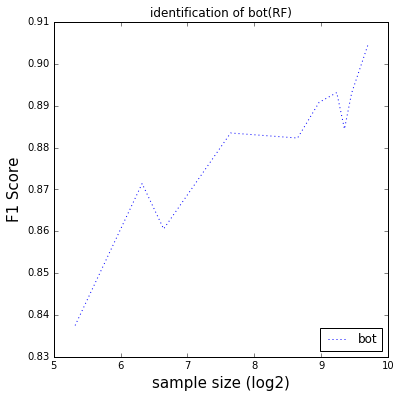

In [126]:
#learning curve
from sklearn import metrics
size = [40, 80, 100, 200, 400, 500, 600, 650, 700, 830]
trials = 10
fig = plt.figure(figsize = (6,6))

fig.add_subplot(1,1,1)
f1_list = []
for i, s in enumerate(size):
    f1s = []
    for k in range(5):
        
        X = X_train.sample(n = s)
        Y = Y_train.ix[X.index]
        lr = RandomForestClassifier(n_estimators=700, max_features=37, random_state=1)
        clf.fit(X, Y)
        predicted = clf.predict(X_test)
        f1s.append(metrics.f1_score(Y_test, predicted))
    f1_list.append(np.array(f1s).mean())



plt.plot(np.log2(np.array(size)), f1_list, 'b:',label='bot')
plt.xlabel('sample size (log2)', fontsize = 15)
plt.ylabel('F1 Score', fontsize = 15)
plt.title('identification of bot(RF)', fontsize = 12)
plt.legend(loc = 4)
